In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [267]:
# Load data from excel sheet

In [268]:
df_2010=pd.read_excel('online_retail_II.xlsx',sheet_name='Year 2010-2011')
df_2009=pd.read_excel('online_retail_II.xlsx',sheet_name='Year 2009-2010')

In [269]:
#combine df
df=pd.concat([df_2009,df_2010],ignore_index=True)

In [270]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [271]:
#Data Cleaning

In [272]:
df.dropna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [273]:
#Remove Canceled Invoices

In [274]:
df=df[df['Quantity']>0]

In [275]:
#Ensure the Column is in Date Format

In [276]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [277]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [278]:
#Splite the year and month into separate columns:

In [279]:
df['Year'] = df['InvoiceDate'].dt.year  
df['Month'] = df['InvoiceDate'].dt.month  

In [280]:
df['TotalSales'] = df['Price'] * df['Quantity']

In [281]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,30.0


In [282]:
#Export data frame
#df.to_csv('online_retail_II.csv', index=False)

In [283]:
#Check for Missing Values

In [284]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1693
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238801
Country             0
Year                0
Month               0
TotalSales          0
dtype: int64

In [285]:
sales_by_country = df.groupby("Country")["Price"].sum().sort_values(ascending=False)
print(sales_by_country)

Country
United Kingdom          3695900.267
EIRE                      94608.190
Germany                   60019.251
France                    59280.470
Norway                    20398.710
Spain                     15781.170
Netherlands               13672.220
Singapore                 13322.500
Belgium                   13004.680
Portugal                  12720.290
Switzerland               11775.210
Hong Kong                 11101.860
Channel Islands            7275.820
Italy                      6995.990
Sweden                     6565.780
Australia                  6529.870
Cyprus                     5885.470
Finland                    4918.200
Austria                    3947.710
Malta                      3768.020
Greece                     2530.780
Denmark                    2277.970
Unspecified                2185.910
United Arab Emirates       2007.350
RSA                        1918.560
Poland                     1861.960
USA                        1463.090
Israel              

In [286]:
#Top 10 sales by country.

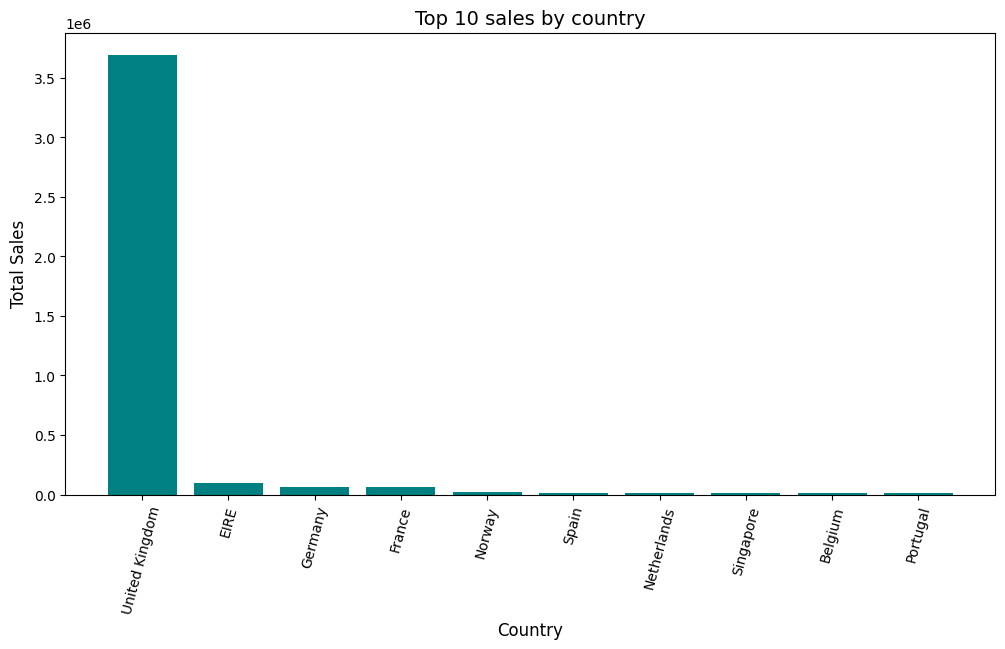

In [289]:
# Get the top 10 countries by total sales
top_countries = sales_by_country.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='teal')

# Add labels and title
plt.title("Top 10 sales by country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=75)  # Rotate country names for better visibility

# Show the plot
plt.show()


In [216]:
#TotalSales by Year

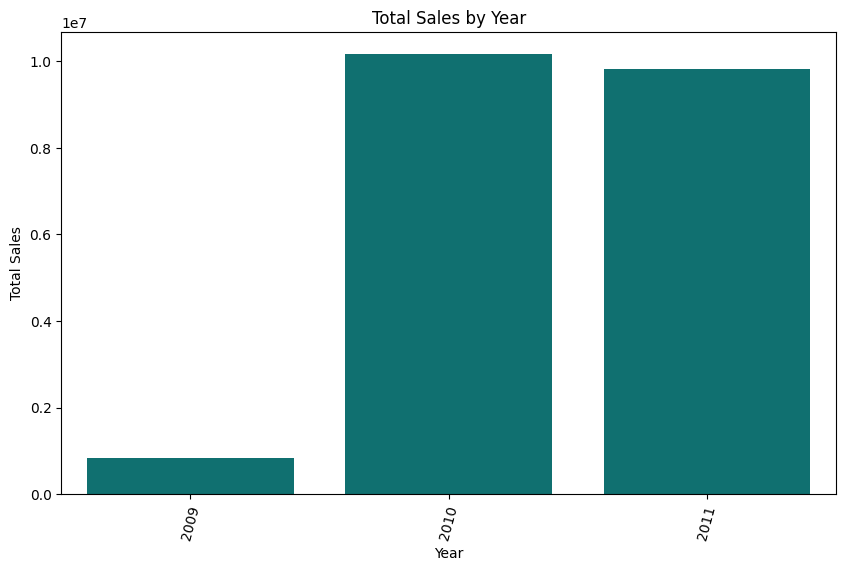

In [290]:
# Group by Year and sum TotalSales
yearly_sales = df.groupby('Year')['TotalSales'].sum().reset_index()

# Plot the yearly sales
plt.figure(figsize=(10, 6))
#sns.barplot(x='Year', y='TotalSales', data=yearly_sales)
sns.barplot(x='Year', y='TotalSales', data=yearly_sales, color='teal')

# Set title and labels
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=75)

# Show the plot
plt.show()

In [291]:
#Best-Selling Products

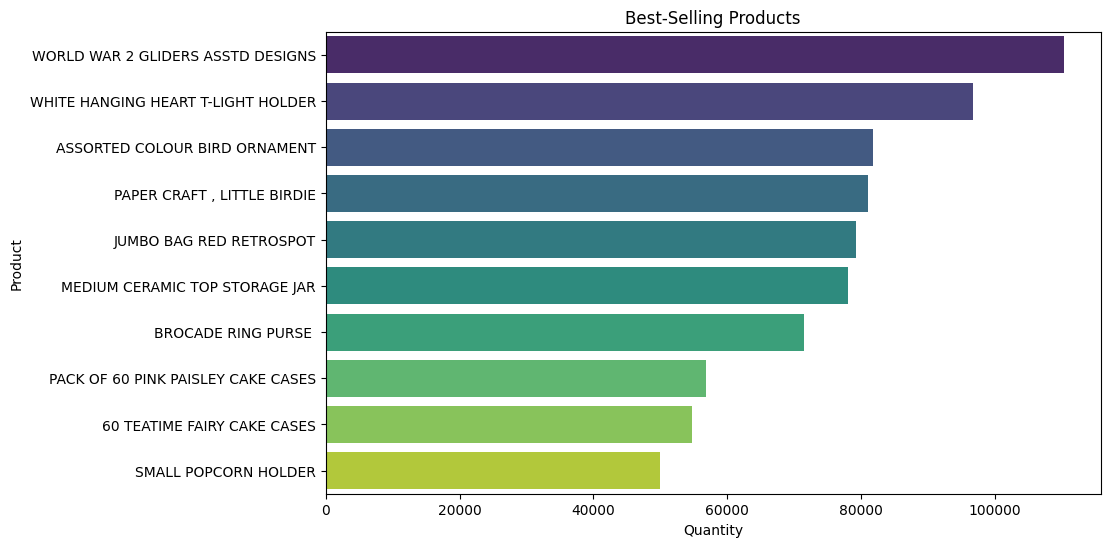

In [292]:
# Get top 10 best-selling products by quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Define the color palette
palette = sns.color_palette("viridis", n_colors=len(top_products))

# Plot the top products with 'hue' to avoid the FutureWarning
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette=palette, hue=top_products.index)

# Set title and labels
plt.title('Best-Selling Products')
plt.xlabel('Quantity')
plt.ylabel('Product')

# Show the plot
plt.show()

In [293]:
#Top 10 customers

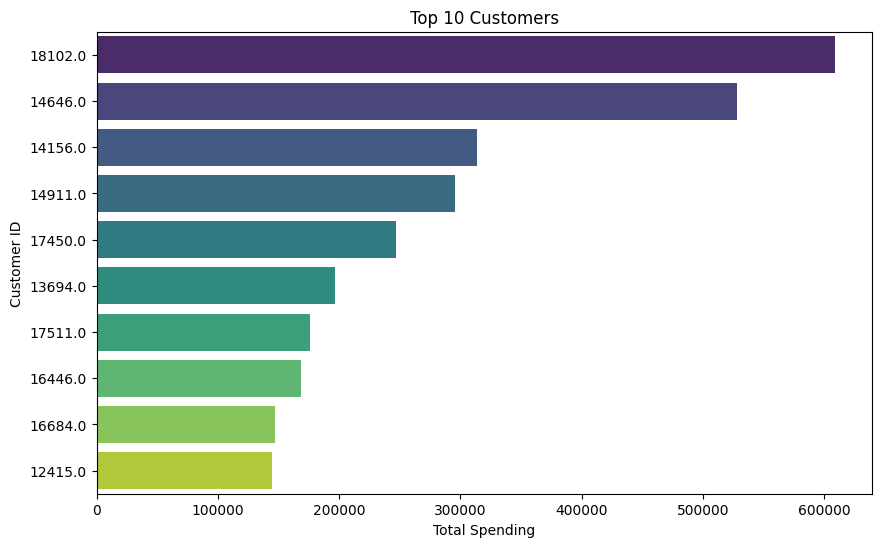

In [294]:
# Get top 10 highest-spending customers by total spending
top_customers = df.groupby('Customer ID')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Define the color palette
palette = sns.color_palette("viridis", n_colors=len(top_customers))

# Plot the top customers with the color palette applied, using 'hue'
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette=palette, hue=top_customers.index.astype(str))

# Set title and labels
plt.title('Top 10 Customers')
plt.xlabel('Total Spending')
plt.ylabel('Customer ID')

# Show the plot
plt.show()


In [295]:
#Analyze large quantities (greater than 1000)

In [296]:
# Analyze large quantities (greater than 1000)
high_quantity = df[df['Quantity'] > 1000]
print("Rows with high quantities (greater than 1000):")
print(high_quantity)

Rows with high quantities (greater than 1000):
        Invoice StockCode                       Description  Quantity  \
7302     490018     21981      PACK OF 12 WOODLAND TISSUES       4320   
7303     490018     21967          PACK OF 12 SKULL TISSUES      5184   
7304     490018     21984  PACK OF 12 PINK PAISLEY TISSUES       4008   
7305     490018     21980    PACK OF 12 RED SPOTTY TISSUES       4008   
17384    490758     72008                               NaN      3000   
...         ...       ...                               ...       ...   
1059273  581115     22413   METAL SIGN TAKE IT OR LEAVE IT       1404   
1060413  581175     23084                RABBIT NIGHT LIGHT      1440   
1065531  581458     22197                    POPCORN HOLDER      1500   
1065532  581459     22197                    POPCORN HOLDER      1200   
1065882  581483     23843       PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  Price  Customer ID         Country  Year  Month

In [242]:
# Analyze high prices (greater than 100)
high_price = df[df['Price'] > 100]
print("Rows with high prices (greater than 100):")
print(high_price)

Rows with high prices (greater than 100):
                    Invoice StockCode     Description  Quantity    Price  \
InvoiceDate                                                                
2009-12-01 09:55:00  489444      POST         POSTAGE         1   141.00   
2009-12-01 10:10:00  489447      POST         POSTAGE         1   130.00   
2009-12-01 14:28:00  489597       DOT  DOTCOM POSTAGE         1   647.19   
2009-12-02 14:36:00  489856       DOT  DOTCOM POSTAGE         1   470.24   
2009-12-02 14:43:00  489857       DOT  DOTCOM POSTAGE         1   775.24   
...                     ...       ...             ...       ...      ...   
2011-12-08 09:28:00  581219       DOT  DOTCOM POSTAGE         1  1008.96   
2011-12-08 10:53:00  581238       DOT  DOTCOM POSTAGE         1  1683.75   
2011-12-08 16:30:00  581439       DOT  DOTCOM POSTAGE         1   938.59   
2011-12-09 10:03:00  581492       DOT  DOTCOM POSTAGE         1   933.17   
2011-12-09 10:26:00  581498       DOT  DOTCOM 

In [297]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,30.0


In [298]:
#Export data frame
df.to_csv('online_retail_II.csv', index=False)

In [299]:
# Extract Year and Month from InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Create a datetime index for aggregation
df.set_index('InvoiceDate', inplace=True)  # <-- Fixed missing parenthesis


In [300]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Year,Month,TotalSales
InvoiceDate,,,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009,12,83.4
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009,12,81.0
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009,12,81.0
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009,12,100.8
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009,12,30.0


In [301]:
#Forecasting

In [349]:
# Ensure 'InvoiceDate' is a datetime index
df.index = pd.to_datetime(df.index)

# Calculate TotalSales (no need to reset index)
df['TotalSales'] = df['Quantity'] * df['Price']
df = df.dropna(subset=['Quantity', 'Price'])

# Resample directly using the index
monthly_sales = df.resample('ME')['TotalSales'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'InvoiceDate': 'Date', 'TotalSales': 'Sales'})
print(monthly_sales.head())

        Date       Sales
0 2009-12-31  825685.760
1 2010-01-31  652708.502
2 2010-02-28  553713.306
3 2010-03-31  833570.131
4 2010-04-30  627934.632


In [350]:
#Time Series Analysis

<Figure size 1200x800 with 0 Axes>

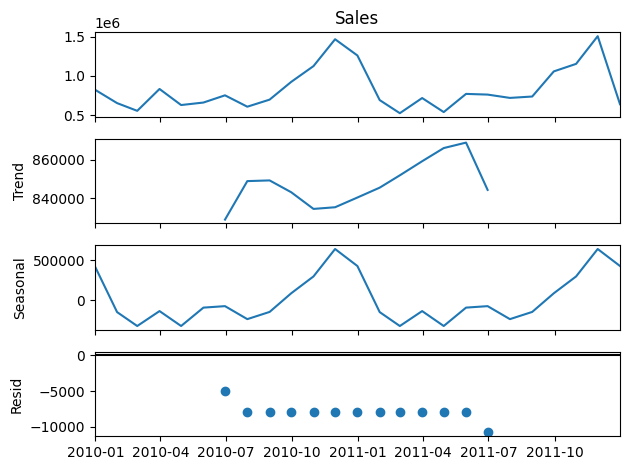

In [351]:
# Ensure 'Date' is a datetime index
monthly_sales.set_index('Date', inplace=True)

# Perform seasonal decomposition (Additive Model)
decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive', period=12)  # Assuming monthly data

# Plot decomposition components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [352]:
#Aggregate Sales by Month

In [353]:
# Group by Year-Month and sum TotalSales
monthly_sales = df.groupby(["Year", "Month"])["TotalSales"].sum().reset_index()

# Create a datetime column for plotting
monthly_sales["Date"] = pd.to_datetime(
    monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str) + "-01"
)

# Set Date as index for time series
monthly_sales.set_index("Date", inplace=True)

In [354]:
#Visualize Time Series

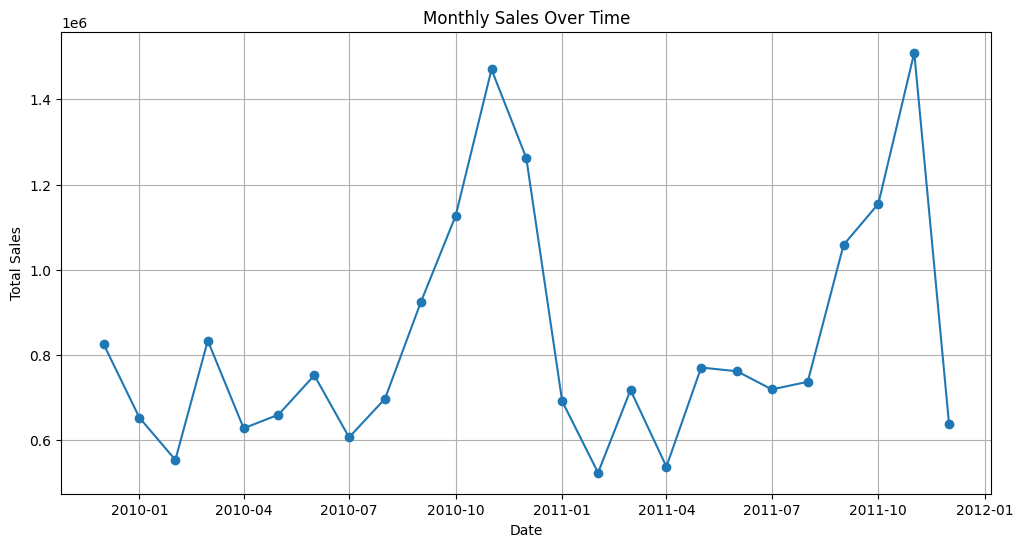

In [356]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales["TotalSales"], marker="o")
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [357]:
#Split Data into Training and Test Sets

In [383]:
# Use 80% for training, 20% for testing
train_size = int(len(monthly_sales) * 0.8)
train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

In [384]:
#6- Forecast with SARIMA (Seasonal ARIMA)

In [392]:
# Ensure complete monthly data and set frequency
monthly_sales = monthly_sales.asfreq("MS", fill_value=0)

# Split data (use 80-20 rule)
train_size = int(len(monthly_sales) * 0.8)
train = monthly_sales.iloc[:train_size]
test = monthly_sales.iloc[train_size:]

# Fit simplified SARIMA
model = SARIMAX(
    train["TotalSales"],
    order=(1, 1, 0),
    seasonal_order=(0, 1, 0, 12),
    initialization="approximate_diffuse"  # Avoid initialization warnings
)
results = model.fit(maxiter=200)  # Increase iterations for convergence

# Generate forecasts
forecast = results.get_forecast(steps=len(test))

In [393]:
#7. Evaluate and Visualize Results

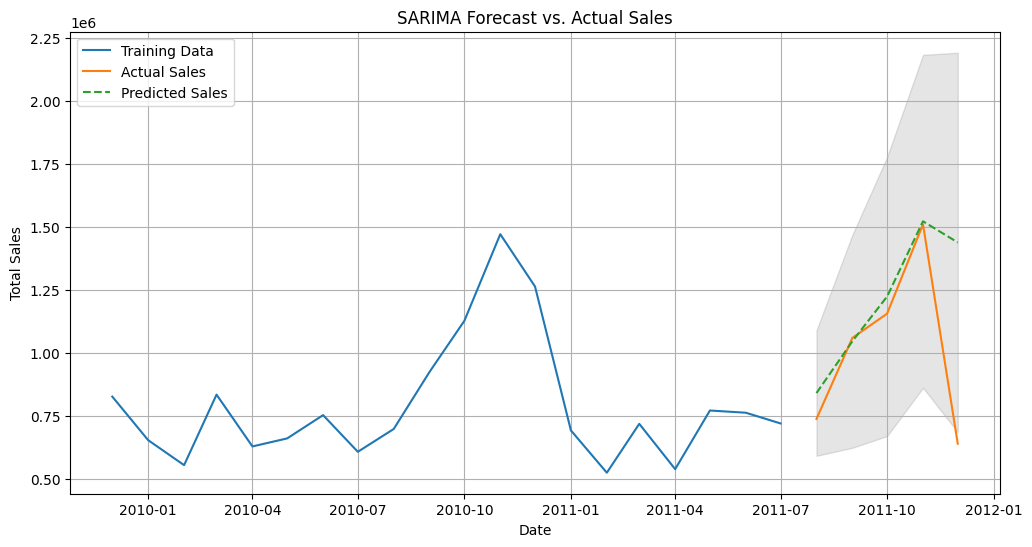

RMSE: 361502.62


In [394]:
# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["TotalSales"], label="Training Data")
plt.plot(test.index, test["TotalSales"], label="Actual Sales")
plt.plot(test.index, predicted_sales, label="Predicted Sales", linestyle="--")
plt.fill_between(
    test.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color="k",
    alpha=0.1
)
plt.title("SARIMA Forecast vs. Actual Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test["TotalSales"], predicted_sales))
print(f"RMSE: {rmse:.2f}")

In [395]:
#Generate Future Forecasts

In [398]:
# Forecast 12 months into the future
future_steps = 12
future_forecast = results.get_forecast(steps=future_steps)
future_sales = future_forecast.predicted_mean

# Generate future dates with "MS" (month start) frequency
future_dates = pd.date_range(
    start=monthly_sales.index[-1],  
    periods=future_steps + 1,       
    freq="MS"                      
)[1:]                               

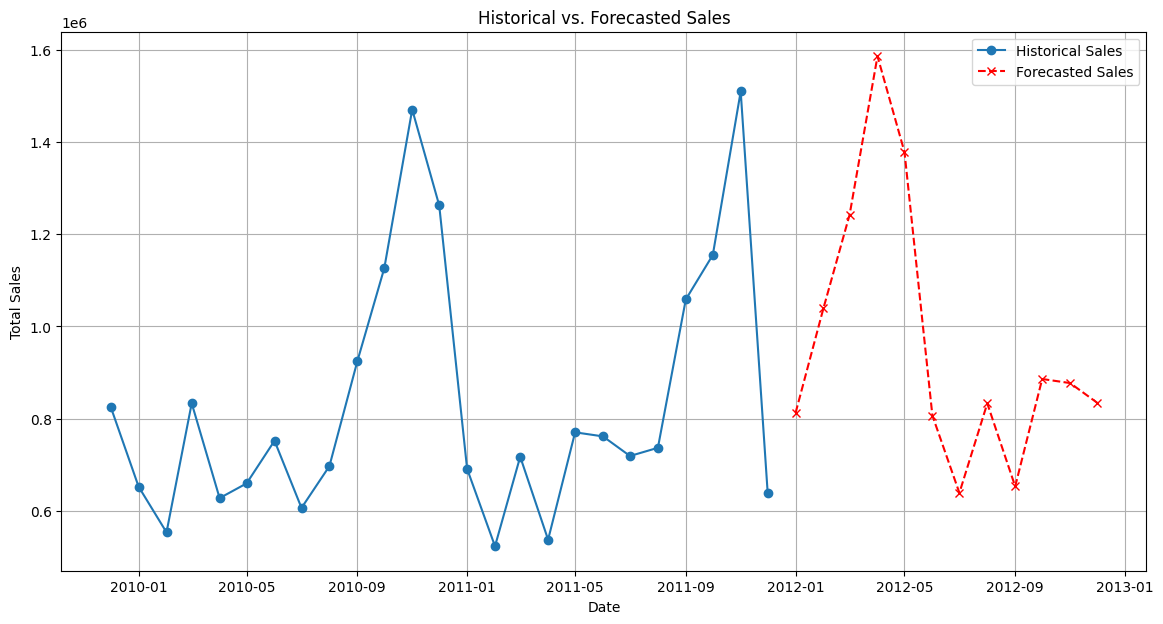

In [401]:
plt.figure(figsize=(14, 7))

plt.plot(monthly_sales.index, monthly_sales["TotalSales"], label="Historical Sales", marker="o")

plt.plot(future_dates, future_sales, label="Forecasted Sales", linestyle="--", marker="x", color="red")

plt.title("Historical vs. Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend()
